### Import Library

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools

### Define Helper Functions

In [224]:
def generate_ifn(value):
    # Generate a random membership degree between 0 and value/4
    # m = np.random.uniform(0, value/4)

    # # Ensure the non-membership degree satisfies m + n <= 1
    # n = np.random.uniform(0, 1 - m)
    ifns = {
        "0":(0.10,0.90),
        "1":(0.20,0.65),
        "2":(0.30,0.55),
        "3":(0.50,0.50),
        "4":(0.65,0.25),
        "5":(0.80,0.05),
        "6":(0.90,0.10)
    }
    return ifns[str(value)]

def m_operation(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    return (min(a1, a2), max(b1, b2))

def M_operation(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    return (max(a1, a2), min(b1, b2))


def dist(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    h1 = 1 - (a1 + b1)
    h2 = 1 - (a2 + b2)

    term1 = (abs(2*(a1 - a2) - (b1 - b2)) / 3) * (1 - (h1 + h2) / 2)
    term2 = (abs(2*(b1 - b2) - (a1 - a2)) / 3) * ((h1 + h2) / 2)

    return term1 + term2

### Input Experts Data

In [225]:
df = pd.read_csv('input.csv')

# Calculate n
n = int(np.sqrt(df.shape[0]))
k = df.shape[1] - 1
# # Initialize the list of expert matrices
expert_matrices = []

# Iterate over the columns of the DataFrame
for i in range(1, df.shape[1]):
    # Convert the column values to a list
    column_values = df.iloc[:, i].tolist()

    # Reshape the list into an n*n matrix
    matrix = np.reshape(column_values, (n, n),order='F')
    matrix = matrix.T
    # Add the matrix to the list
    expert_matrices.append(matrix)

    # Convert matrices to IFN matrices
ifn_matrices = []

for matrix in expert_matrices:
    ifn_matrix = np.array([[generate_ifn(value) for value in row] for row in matrix])
    ifn_matrices.append(ifn_matrix)

# Write the matrices and IFN matrices to a file
with open("solution.txt", "w") as file:
    for i, (matrix, ifn_matrix) in enumerate(zip(expert_matrices, ifn_matrices), 1):
        file.write(f"Expert Matrix {i}:\n")
        for row in matrix:
            file.write(" ".join(map(str, row)) + "\n")
        file.write("\n")

        file.write(f"Expert {i} IFN Matrix :\n")
        for row in ifn_matrix:
            file.write(" ".join([f"({m:.2f}, {n:.2f})" for m, n in row]) + "\n")
        file.write("\n")

print("Matrices and IFN matrices have been written to 'solution.txt'")

Matrices and IFN matrices have been written to 'solution.txt'


In [226]:
# priority_parameter=float(input("Enter the Priority Parameter: "))
priority_parameter=0.5

### Calculate IFPIO  Matrix

In [227]:
IFPIO = np.zeros((n, n, 2))  # Initialize a nxn matrix with pairs
for i in range(n):
    for j in range(n):
        result = [1, 1]  # Initialize with neutral element for the $ operation
        for ifn_matrix in ifn_matrices:
            result = [result[0] * (ifn_matrix[i][j][0]**(1/k)),result[1]*((1-ifn_matrix[i][j][1])**(1/k))]
        IFPIO[i][j] = [result[0],1-result[1]]  # Take the average

# Append the IFPIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFPIO Matrix (Intuitionistic Fuzzy Positive Ideal Opinion Matrix):\n")
    for row in IFPIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFPIO matrix has been appended to 'solution.txt'")


IFPIO matrix has been appended to 'solution.txt'


### Calculate IFNIO Matrice

In [228]:
# Compute the IFNIO matrix by swapping the pairs from the IFPIO matrix
IFNIO = np.array([[(b, a) for a, b in row] for row in IFPIO])

# Append the IFNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFNIO Matrix (Intuitionistic Fuzzy Negative Ideal Opinion Matrix):\n")
    for row in IFNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFNIO matrix has been appended to 'solution.txt'")


IFNIO matrix has been appended to 'solution.txt'


### Calculate IFLNIO Matrix

In [229]:
# Compute the IFLNIO matrix using the m operation
IFLNIO = np.zeros((n, n, 2))  # Initialize a 5x5 matrix with pairs

for i in range(n):
    for j in range(n):
        result = ifn_matrices[0][i][j]  # Start with the first IFN matrix
        for p in range(1, len(ifn_matrices)):
            result = m_operation(result, ifn_matrices[p][i][j])
        IFLNIO[i][j] = result

# Append the IFLNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFLNIO Matrix (Intuitionistic Fuzzy Left Negative Ideal Opinion Matrix):\n")
    for row in IFLNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFLNIO matrix has been appended to 'solution.txt'")


IFLNIO matrix has been appended to 'solution.txt'


### Calculate IFRNIO Matrix

In [230]:
# Compute the IFRNIO matrix using the M operation
IFRNIO = np.zeros((n, n, 2))  # Initialize a 5x5 matrix with pairs

for i in range(n):
    for j in range(n):
        result = ifn_matrices[0][i][j]  # Start with the first IFN matrix
        for p in range(1, len(ifn_matrices)):
            result = M_operation(result, ifn_matrices[p][i][j])
        IFRNIO[i][j] = result

# Append the IFRNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFRNIO Matrix (Intuitionistic Fuzzy Right Negative Ideal Opinion Matrix):\n")
    for row in IFRNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFRNIO matrix has been appended to 'solution.txt'")

IFRNIO matrix has been appended to 'solution.txt'


### Defined List of names of matrix

In [231]:
matrices_list = [IFPIO, IFNIO, IFLNIO, IFRNIO]
matrices_names = ["IFPIO", "IFNIO", "IFLNIO", "IFRNIO"]

# List of the five IFN matrices
ifn_matrices_list = ifn_matrices
ifn_matrices_names = [f"IFN{p+1}" for p in range(k)]
expert_matrices_names = [f"Expert_{p+1}" for p in range(k)]
# Dictionary to store the distance matrices
distance_matrices_dict = {}

### Calculate distance matrix for all the possible combinations

In [232]:
# Compute the distance matrices for all n*k combinations
with open("solution.txt", "a") as file:
    for i, matrix in enumerate(matrices_list):
          for j, ifn_matrix in enumerate(ifn_matrices_list):
              distance_matrix = np.zeros((n, n))
              for x in range(n):
                  for y in range(n):
                      distance_matrix[x][y] = dist(matrix[x][y], ifn_matrix[x][y])

              # Store the distance matrix in the dictionary
              key = f"{matrices_names[i]}_to_{ifn_matrices_names[j]}"

              distance_matrices_dict[key] = distance_matrix

              # Append the distance matrix to the solution.txt file
              file.write(f"Distance Matrix between {matrices_names[i]} and {ifn_matrices_names[j]}:\n")
              for row in distance_matrix:
                  file.write(" ".join([f"{value:10.5f}" for value in row]) + "\n")
              file.write("\n")

print("All distance matrices have been computed and stored.")

All distance matrices have been computed and stored.


### Initialize DistanceMatrix

In [233]:
DistanceMatrix = np.zeros((k, 4))

### Calculate Values for DistanceMatrix

In [234]:
# Compute the values for DistanceMatrix
for i, ifn_name in enumerate(ifn_matrices_names):
    for j, matrix_name in enumerate(matrices_names):
        key = f"{matrix_name}_to_{ifn_name}"
        DistanceMatrix[i][j] = np.sum(distance_matrices_dict[key])

# Append the DistanceMatrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("DistanceMatrix (Summation of Distance Matrices):\n")

    # Top boundary
    file.write("+" + "-" * (len(matrices_names) * 12 + 7) + "+\n")

    # Column names with vertical boundaries
    file.write("|       " + " | ".join(matrices_names) + " |\n")

    # Separator line
    file.write("|" + "-" * (len(matrices_names) * 12 + 7) + "|\n")

    # Matrix rows with vertical boundaries
    for i, row in enumerate(DistanceMatrix):
        file.write("| " + expert_matrices_names[i] + " " + " | ".join([f"{value:10.5f}" for value in row]) + " |\n")

    # Bottom boundary
    file.write("+" + "-" * (len(matrices_names) * 12 + 7) + "+\n\n")

print("DistanceMatrix with a boundary has been appended to 'solution.txt'")

DistanceMatrix with a boundary has been appended to 'solution.txt'


### Calculate Closeness Coefficient

In [235]:
closeness_coefficients = []

In [236]:
for i in range(k):  # For each IFN
        numerator = sum(DistanceMatrix[i, j] for j in [1, 2, 3])  # Sum values from IFNIO, IFLNIO, and IFRNIO columns
        denominator = sum(DistanceMatrix[i])  # Sum values from all four columns
        coefficient = numerator / denominator if denominator != 0 else 0  # Handle potential division by zero
        closeness_coefficients.append(coefficient)

# Append the closeness coefficients to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Closeness Coefficients for each Expert:\n")
    for i, coefficient in enumerate(closeness_coefficients):
        file.write(f"{expert_matrices_names[i]}: {coefficient:10.5f}\n")
    file.write("\n")

print("Closeness coefficients have been computed and appended to 'solution.txt'")

Closeness coefficients have been computed and appended to 'solution.txt'


### Calculate **μ** [degree of membership] , **ν** [degree of non-membership] , **π** [degree of hesitation]



In [237]:
mu_values = []
nu_values = []
hesitation_values = []

# Compute the values for each IFN
for i in range(k):
    # Compute mu value
    denominator = DistanceMatrix[i, 0] + DistanceMatrix[i, 1]
    mu = DistanceMatrix[i, 1] / denominator if denominator != 0 else 0
    mu_values.append(mu)

    # Compute nu value
    nu = 1 - closeness_coefficients[i]
    nu_values.append(nu)

    # Compute hesitation value
    hesitation = 1 - (mu + nu)
    hesitation_values.append(hesitation)

# Append the table to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Table of  μ, ν, and π values for each Expert:\n")
    file.write("IFN     |      μ     |   ν   | π\n")
    file.write("-" * 50 + "\n")
    for i in range(k):
        file.write(f"{expert_matrices_names[i]:<8}| {mu_values[i]:10.5f} | {nu_values[i]:10.5f} | {hesitation_values[i]:10.5f}\n")
    file.write("\n")

print("Table of  μ, ν, and π values has been appended to 'solution.txt'")

Table of  μ, ν, and π values has been appended to 'solution.txt'


### Weight For Each Expert

In [238]:
# Compute the weights W for each IFN
weights = []
for i in range(k):
    mu = mu_values[i]
    nu = nu_values[i]
    hesitation = hesitation_values[i]
    weight = mu + hesitation * (mu / (mu + nu) if mu + nu != 0 else 0)  # Handle potential division by zero
    weights.append(weight)

# Compute the normalized weights NW
total_weight = sum(weights)
normalized_weights = [weight / total_weight if total_weight != 0 else 0 for weight in weights]  # Handle potential division by zero

# Append the weights and normalized weights to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Weights (W) and Normalized Weights (NW) for each Expert:\n")
    file.write("Expert     |     W      |     NW\n")
    file.write("-" * 40 + "\n")
    for i in range(k):
        file.write(f"{expert_matrices_names[i] :<8}| {weights[i]:10.5f} | {normalized_weights[i]:10.5f}\n")
    file.write("\n")

print("Weights and normalized weights have been computed and appended to 'solution.txt'")

Weights and normalized weights have been computed and appended to 'solution.txt'


### Inter-Relationship mining between factors

### Defining Function for getting weighted IFN matrix

In [239]:
def multiply_matrix_and_weight(matrix, weight):
    """
    Multiplies each element of the matrix (each IFN) by the weight.
    Since the matrix contains tuples, we'll handle the multiplication element-wise for the tuples.
    """
    weighted_matrix = []
    for row in matrix:
        weighted_row = [(weight * element[0], weight * element[1]) for element in row]
        weighted_matrix.append(weighted_row)
    return weighted_matrix

### Get the weighted IFN matrices

In [240]:
expert_weighted_ifn_matrices = [multiply_matrix_and_weight(matrix, weight) for matrix, weight in zip(ifn_matrices, normalized_weights)]

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nExpert Weighted IFN Matrices:\n")
    for i, matrix in enumerate(expert_weighted_ifn_matrices):
        file.write(f"\nMatric {i + 1}:\n")
        for row in matrix:
            # Writing each row in a readable format
            row_str = ', '.join([f"({x:.2f}, {y:.2f})" for x, y in row])
            file.write(f"{row_str}\n")

print("Expert weighted IFN matrices have been written to 'solution.txt'.")


Expert weighted IFN matrices have been written to 'solution.txt'.


### Generate Intuitionistic Fuzzy Weight Aggregated Inter-influence Matrix (IFWAIIM)

In [241]:
def aggregate_with_dollar_operation(matrices,weights):
    """
    Aggregate multiple IFN matrices using the '$' operation.
    """
    aggregated_matrix = np.zeros((n,n,2))
    for i in range(n):
      for j in range(n):
        e = 0;
        result = [1, 1]  # Initialize with neutral element for the $ operation
        for ifn_matrix in ifn_matrices:
            result = [result[0] * (ifn_matrix[i][j][0]**(weights[e])),result[1]*((1-ifn_matrix[i][j][1])**weights[e])]
            e = e+1
        aggregated_matrix[i][j] = [result[0],1-result[1]]  # Take the average
    return aggregated_matrix


# Calculate the IFWAIIM
ifwaiim = aggregate_with_dollar_operation(ifn_matrices,normalized_weights)

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nIntuitionistic Fuzzy Weight Aggregated Inter-influence Matrix (IFWAIIM):\n")
    for row in ifwaiim:
        # Writing each row in a readable format
        row_str = ', '.join([f"({x:.2f}, {y:.2f})" for x, y in row])
        file.write(f"{row_str}\n")

print("IFWAIIM has been written to 'solution.txt'.")


IFWAIIM has been written to 'solution.txt'.


### Generate C-IIM (Crisp Inter-Infuence Matrix)

In [242]:
def transform_to_crisp_value(ifn):
    """
    Transform an IFN to a crisp value using the formula (mu - nu + 1) / 2.
    """
    mu, nu = ifn
    return (mu - nu + 1) / 2

def create_ciim(ifwaiim):
    """
    Create the Crisp Inter-Influence Matrix (CIIM) by transforming the IFWAIIM.
    """
    ciim = []
    for row in ifwaiim:
        crisp_row = [transform_to_crisp_value(ifn) for ifn in row]
        ciim.append(crisp_row)
    return ciim


# Create the CIIM from the IFWAIIM
ciim = create_ciim(ifwaiim)

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nCrisp Inter-Influence Matrix (CIIM):\n")
    for row in ciim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("CIIM has been written to 'solution.txt'.")

CIIM has been written to 'solution.txt'.


### Determine the MAXSUM(m*)

In [243]:
# Step 1: Find the maximum in each row and sum these maximums
m1 = np.max(np.sum(ciim, axis=1))

# Step 2: Find the maximum in each column and sum these maximums
m2 = np.max(np.sum(ciim, axis=0))

# Step 5: Determine the maximum between 'max_row_sum' and 'max_col_sum'
max_value_in_ciim = max(m1, m2)

    # Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Maximum Value in CIIM: {max_value_in_ciim:.2f}\n")
    file.write("========================================\n")  # For emphasis and separation

print("Maximum value in CIIM has been written to 'solution.txt'.")

Maximum value in CIIM has been written to 'solution.txt'.


### Generate N-IIM (Normalized Inter-Infuence Matrix)

In [244]:
n_iim = [[value / max_value_in_ciim for value in row] for row in ciim]

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nNormalized Inter-Influence Matrix (N-IIM):\n")
    for row in n_iim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.6f}" for value in row])
        file.write(f"{row_str}\n")

print("N-IIM has been written to 'solution.txt'.")

N-IIM has been written to 'solution.txt'.


### Generate T-IIM (Total Inter-Infuence Matrix)

In [245]:
# Generate an identity matrix of size n x n
identity_matrix = np.identity(n)

# Calculate (I - n_iim)
subtract_matrix = identity_matrix - n_iim
try:
    # Calculate the inverse of (I - n_iim)
    inverse_matrix = np.linalg.inv(subtract_matrix)
except np.linalg.LinAlgError:
    # Handle the case where the matrix is not invertible
    print("Error: (I - n_iim) matrix is not invertible.")
    exit()

with open('solution.txt', 'a') as file:  # 'a' stands for append mode
        file.write("\nInverse of (I - n_iim):\n")
        for row in inverse_matrix:
            row_str = ', '.join([f"{value:.2f}" for value in row])
            file.write(f"[{row_str}]\n")

# Calculate T-IIM: n_iim * (I - n_iim)^-1
t_iim =n_iim @ inverse_matrix

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nTotal Inter-Influence Matrix (T-IIM):\n")
    for row in t_iim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("T-IIM has been written to 'solution.txt'.")




T-IIM has been written to 'solution.txt'.


### Calculating  **α** , **minimum and maximum**



In [246]:
# Calculate the average of all elements in the matrix.
α = np.mean(t_iim)+(np.std(t_iim)/2)
# Find the maximum and minimum values in the matrix
max_t_iim = np.max(t_iim)
min_t_iim = np.min(t_iim)


with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Threshold : {α:.4f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Threshold α has been written to 'solution.txt'.")
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Minimum : {min_t_iim:.4f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Minimum value has been written to 'solution.txt'.")
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Maximum : {max_t_iim:.4f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Maximum value has been written to 'solution.txt'.")




Threshold α has been written to 'solution.txt'.
Minimum value has been written to 'solution.txt'.
Maximum value has been written to 'solution.txt'.


### Modified Total Inter-Influence Matrix

In [247]:


identity_matrix = np.identity(n)
modified_t_iim = t_iim + identity_matrix
# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nModified Total Inter-Influence Matrix:\n")
    for row in modified_t_iim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("Modified T-IIM has been written to 'solution.txt'.")


Modified T-IIM has been written to 'solution.txt'.


### Calculating Reachability Matrix

In [248]:
# prompt: if modified_t_iim value is greater than alpha then 1 else 0 ... call it reachable matrix

reachable_matrix = np.where(modified_t_iim >= α, 1, 0)

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nReachability Matrix:\n")
    for row in reachable_matrix:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value}" for value in row])
        file.write(f"{row_str}\n")

print("Reachability Matrix has been written to 'solution.txt'.")


Reachability Matrix has been written to 'solution.txt'.


### Calculate #influenced, #influent_DA, DAI


In [249]:
influenced= np.zeros(n, dtype=int)
influent_DA= np.zeros(n, dtype=int)

# Generate a random Directly Accessible Index (DAI) list with binary values
# Count the number of directly accessible factors influencing each factor
dai_values = input("Enter the DAI values for each factor separated by space: ")

# Split the string into a list of values
values_list = dai_values.split()

# Convert each value to the desired type, e.g., int, if necessary
DAI = [int(value) for value in values_list]
# Count the number of directly accessible factors influencing each factor
for i in range(n):
        for j in range(n):
            if reachable_matrix[i, j] == 1 and i!=j:
                    influenced[i] += 1
            if reachable_matrix[j,i] == 1 and i!=j and DAI[j]==1:
                    influent_DA[i] += 1

# Write the results to the file in a tabular form
with open('solution.txt', 'a') as file:
     file.write("+--------+-----+-------------+-------------+\n")
     file.write("| Factor | DAI | #Influenced | #Influent_DA |\n")
     file.write("+--------+-----+-------------+-------------+\n")
     for i in range(n):
        file.write(f"| {i+1:<6} | {DAI[i]:<3} | {influenced[i]:<11} | {influent_DA[i]:<11} |\n")
        file.write("+--------+-----+-------------+-------------+\n")

Enter the DAI values for each factor separated by space: 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0


### Initial level Partitioning

In [250]:
df = pd.DataFrame({
        'Factor': np.arange(1,n+1),
        'DAI': DAI,
        '#Influenced': influenced,
        '#Influent_DA': influent_DA
    })

# Sorting based on the rules provided
df.sort_values(by=['#Influent_DA', '#Influenced', 'DAI'], ascending=[True, True, False], inplace=True)

 # Assign levels and sub-levels
df['Level'] = None
current_level = 1
sublevel_char = 'a'
df = df.reset_index(drop=True);
for i in range(n):
    if i > 0:
        same_influent_DA = df.iloc[i]['#Influent_DA'] == df.iloc[i - 1]['#Influent_DA']
        same_influenced = df.iloc[i]['#Influenced'] == df.iloc[i - 1]['#Influenced']
        same_DAI = df.iloc[i]['DAI'] == df.iloc[i - 1]['DAI']
        # print(same_influent_DA,same_influenced,same_DAI)
        if not same_influent_DA:
            current_level += 1
            sublevel_char = 'a'
        elif same_influenced and same_DAI:
            # same sub-level if all are equal
            pass
        else:
            # next sub-level (a, b, c, ...)
            sublevel_char = chr(ord(sublevel_char) + 1)
    df.at[i,"Level"] = f"{current_level}-{sublevel_char}"
    # print(df.at[i, 'Level'])
df.sort_values(by=['Factor'], ascending=[True], inplace=True)
df = df.reset_index(drop=True);
print(df)
with open("solution.txt", 'a') as file:
        file.write("Initial Level Partitioning\n")
        file.write(df.to_string(index=False))
        file.write("\n\n")
print("Solution with levels has been written to 'solution_with_levels.txt'.")

    Factor  DAI  #Influenced  #Influent_DA Level
0        1    1            3             3   4-b
1        2    1           12            10   9-a
2        3    1            7             4   5-b
3        4    1            0             0   1-a
4        5    1            0             0   1-a
5        6    0            7             8   7-a
6        7    1            4             2   3-a
7        8    1            3             0   1-b
8        9    1            9             9   8-a
9       10    1            5             4   5-a
10      11    1           11             5   6-b
11      12    1            2             3   4-a
12      13    1            8             5   6-a
13      14    1            0             0   1-a
14      15    1           10             2   3-b
15      16    1            5             1   2-a
16      17    0           14            11  10-a
17      18    0           14            12  11-a
Solution with levels has been written to 'solution_with_levels.txt'.


### Iterative Level Partitioning



In [251]:
# returns 1 if val1>val2 , -1 if val1<val2 and 0 if both are equal
def compare_values(val1, val2):
    # Splitting the values into numeric and alphabetic parts
    num1, alpha1 = val1.split('-')
    num2, alpha2 = val2.split('-')

    # Convert numeric parts to integers for comparison
    num1, num2 = int(num1), int(num2)

    # Compare numeric parts
    if num1 > num2:
        return 1
    elif num1 < num2:
        return -1
    else:
        # If numeric parts are equal, compare alphabetic parts
        if alpha1 > alpha2:
            return 1
        elif alpha1 < alpha2:
            return -1
        else:
            return 0


def recalculate_values(df, RM):
    # Recalculating #influent_DA and #influenced based on the current level partitioning
    n = len(df)
    new_influent_DA = np.zeros(n, dtype=int)
    new_influenced = np.zeros(n, dtype=int)

    for i in range(n):
        for j in range(n):
            if RM[i, j] == 1 and i!=j:
                if compare_values(df.at[i, 'Level'] , df.at[j, 'Level'])==-1:
                    new_influenced[i] += 1
            if RM[j,i] == 1 and i!=j:
                if compare_values(df.at[i, 'Level'] ,df.at[j, 'Level'])==1and DAI[j]==1:
                    new_influent_DA[i] += 1

    df['#Influent_DA'] = new_influent_DA
    df['#Influenced'] = new_influenced
    return df

def assign_levels(df):
  # Sorting and assigning levels
  df.sort_values(by=['#Influent_DA', '#Influenced', 'DAI'], ascending=[True, True, False], inplace=True)
  df['Level'] = None
  current_level = 1
  sublevel_char = 'a'
  df = df.reset_index(drop=True)
  for i in range(n):
    if i > 0:
        same_influent_DA = df.iloc[i]['#Influent_DA'] == df.iloc[i - 1]['#Influent_DA']
        same_influenced = df.iloc[i]['#Influenced'] == df.iloc[i - 1]['#Influenced']
        same_DAI = df.iloc[i]['DAI'] == df.iloc[i - 1]['DAI']
        # print(same_influent_DA,same_influenced,same_DAI)
        if not same_influent_DA:
            current_level += 1
            sublevel_char = 'a'
        elif same_influenced and same_DAI:
            # same sub-level if all are equal
            pass
        else:
            # next sub-level (a, b, c, ...)
            sublevel_char = chr(ord(sublevel_char) + 1)
    df.at[i,"Level"] = f"{current_level}-{sublevel_char}"
    # print(df.at[i, 'Level'])
  df.sort_values(by=['Factor'], ascending=[True], inplace=True)
  df = df.reset_index(drop=True);
  return df

def perform_iterations(df, RM):
  iteration = 0
  history = []
  i = 1
  while i<20:
      df = recalculate_values(df, RM)
      df = assign_levels(df)
      iteration += 1

      # Check if the level partitioning has stabilized
      if iteration>1:
        print(history[-1])

      if iteration > 1 and df.equals(history[-1]):
          break

      history.append(df.copy())
      i = i+1;

  return history

iterations_history = perform_iterations(df, reachable_matrix)
df = iterations_history[-1]
# Writing the results to 'solution.txt'
with open('solution.txt', 'a') as file:
    for i, iteration_df in enumerate(iterations_history, start=1):
        file.write(f"Iteration {i}\n")
        file.write(iteration_df.to_string(index=False))
        file.write("\n\n")



    Factor  DAI  #Influenced  #Influent_DA Level
0        1    1            3             1   2-a
1        2    1            2            10   7-a
2        3    1            7             1   2-c
3        4    1            0             0   1-a
4        5    1            0             0   1-a
5        6    0            4             6   5-a
6        7    1            4             0   1-d
7        8    1            3             0   1-c
8        9    1            3             8   6-a
9       10    1            5             1   2-b
10      11    1            5             3   4-a
11      12    1            2             0   1-b
12      13    1            6             2   3-a
13      14    1            0             0   1-a
14      15    1           10             0   1-f
15      16    1            5             0   1-e
16      17    0            1            11   8-a
17      18    0            0            12   9-a


# Factor Ranking Stage

## Sub level depth of factors

In [252]:
def custom_sort(level):
    parts = level.split('-')
    number = int(parts[0])
    letter = parts[1] if len(parts) > 1 else ''
    return (number, letter)

sorted_df = df.sort_values(by='Level', key=lambda x: x.map(custom_sort))
def assign_consecutive_levels(df, level_column='Level'):
    """
    Assigns consecutive integer levels to a DataFrame based on a specified level column.
    This function assumes that the DataFrame is already sorted by the level column.
    """
    unique_levels = df[level_column].unique()
    level_mapping = {level: i+1 for i, level in enumerate(unique_levels)}

    df['SubLevelDepth'] = df[level_column].map(level_mapping)
    print(df)
    df.sort_values(by=['Factor'], ascending=[True], inplace=True)
    return df
df = assign_consecutive_levels(sorted_df)
with open('solution.txt', 'a') as file:
      file.write(f"Sub Level Depth Of Factors\n")
      file.write(df.to_string(index=False))
      file.write("\n\n")
print(df)

    Factor  DAI  #Influenced  #Influent_DA Level  SubLevelDepth
3        4    1            0             0   1-a              1
4        5    1            0             0   1-a              1
13      14    1            0             0   1-a              1
11      12    1            2             0   1-b              2
7        8    1            3             0   1-c              3
6        7    1            4             0   1-d              4
15      16    1            5             0   1-e              5
14      15    1           10             0   1-f              6
0        1    1            3             1   2-a              7
9       10    1            5             1   2-b              8
2        3    1            7             1   2-c              9
12      13    1            6             2   3-a             10
10      11    1            5             3   4-a             11
5        6    0            4             6   5-a             12
8        9    1            3            

## Upper Level Drive (uld) and Lower Level Dependence (lldp)

In [253]:
def influeneced_higher_depth_TIIM(df, TIIM):
    sums = []
    for index, row in df.iterrows():
        current_level = row['Level']
        # Sum TIIM values for factors influenced by the current factor and having a higher level
        sum_val = sum(TIIM[row['Factor'] - 1, i] for i in range(len(df)) if df.at[i, 'Level'] > current_level)
        sums.append(sum_val)
    return sums

def influent_lower_depth_TIIM(df, TIIM):
    sums = []
    for index, row in df.iterrows():
        current_level = row['Level']
        # Sum TIIM values for factors influenced by the current factor and having a higher level
        sum_val = sum(TIIM[i,row['Factor'] - 1] for i in range(len(df)) if df.at[i, 'Level'] < current_level)
        sums.append(sum_val)
    return sums
# Apply the function to the DataFrame
df['ULD'] = influeneced_higher_depth_TIIM(df, t_iim)
df['LLD'] = influent_lower_depth_TIIM(df, t_iim)
print(df)

    Factor  DAI  #Influenced  #Influent_DA Level  SubLevelDepth       ULD  \
0        1    1            3             1   2-a              7  1.623923   
1        2    1            2            10   7-a             14  0.476587   
2        3    1            7             1   2-c              9  1.438237   
3        4    1            0             0   1-a              1  1.616010   
4        5    1            0             0   1-a              1  1.991570   
5        6    0            4             6   5-a             12  0.836452   
6        7    1            4             0   1-d              4  2.079077   
7        8    1            3             0   1-c              3  2.183703   
8        9    1            3             8   6-a             13  0.654545   
9       10    1            5             1   2-b              8  1.525301   
10      11    1            5             3   4-a             11  1.136714   
11      12    1            2             0   1-b              2  2.214701   

### Total Drive and Total Dependence of Factors

In [254]:
def total_drive(df, TIIM):
    sums = []
    for index, row in df.iterrows():
        # Sum TIIM values for factors influenced by the current factor and having a higher level
        sum_val = sum(TIIM[row['Factor'] - 1, i] for i in range(len(df)))
        sums.append(sum_val)
    return sums

def total_dependence(df, TIIM):
    sums = []
    for index, row in df.iterrows():
        current_level = row['Level']
        # Sum TIIM values for factors influenced by the current factor and having a higher level
        sum_val = sum(TIIM[i,row['Factor'] - 1] for i in range(len(df)))
        sums.append(sum_val)
    return sums

df['TotalDrive'] = total_drive(df,t_iim)
df['TotalDependence'] = total_dependence(df,t_iim)

### Sub Level Index (SLI) Calculation

In [255]:

df['SLI'] = [DF/(n-DF+1) for DF in df['SubLevelDepth']]
sli_counts = df['SLI'].value_counts()
multi_occurrence_sli = sli_counts[sli_counts > 1].index

def correct_sli(x):
  DF = df['SubLevelDepth'][x]
  k = df['SLI'][x] + 0.5*(((DF+1)/(n-DF))-df['SLI'][x])*((df['ULD'][x]/df['TotalDrive'][x])+(df['LLD'][x]/df['TotalDependence'][x]) )
  return k
# Apply the formula to elements with more than one occurrence, keep original values for others
df['IMP_F'] = [correct_sli(i) if df.at[i, 'SLI'] in multi_occurrence_sli else df.at[i, 'SLI'] for i in df.index]
df['n_sig'] = df['IMP_F'] / sum(df['IMP_F'])
df_sorted_for_ranking = df.sort_values(by='IMP_F', ascending=False)
df_sorted_for_ranking['Rank'] = range(1, len(df) + 1)

# Add the rank back to the original DataFrame
df = df.join(df_sorted_for_ranking['Rank'], how='left')
with open('solution.txt', 'a') as file:
      file.write(f"Importance Of Factors\n")
      file.write(df.to_string(index=False))
      file.write("\n\n")
print(df)

    Factor  DAI  #Influenced  #Influent_DA Level  SubLevelDepth       ULD  \
0        1    1            3             1   2-a              7  1.623923   
1        2    1            2            10   7-a             14  0.476587   
2        3    1            7             1   2-c              9  1.438237   
3        4    1            0             0   1-a              1  1.616010   
4        5    1            0             0   1-a              1  1.991570   
5        6    0            4             6   5-a             12  0.836452   
6        7    1            4             0   1-d              4  2.079077   
7        8    1            3             0   1-c              3  2.183703   
8        9    1            3             8   6-a             13  0.654545   
9       10    1            5             1   2-b              8  1.525301   
10      11    1            5             3   4-a             11  1.136714   
11      12    1            2             0   1-b              2  2.214701   

### keep only significant factor && Assign Blocks to each factor

In [256]:
df = df[(df['#Influenced'] != 0) | (df['#Influent_DA'] != 0)]

df['Level'] = df['Level'].astype(str)
df['Factor'] = df['Factor'].astype(int)
df['Bucket'] = df['Level'].apply(lambda x: int(x.split('-')[0]))

# Sorting by the integer part and then assigning bucket numbers
df = df.sort_values(by='Bucket')
df['Block'] = df['Bucket'].rank(method='dense').astype(int)
df = df.sort_values(by='Level', key=lambda x: x.map(custom_sort))
df = df.reset_index(drop=True);

df.drop('Bucket', axis=1, inplace=True)  # Dropping the intermediate 'Bucket' column
with open('solution.txt', 'a') as file:
      file.write(f"Blocks Assignment to each significant factor\n")
      file.write(df.to_string(index=False))
      file.write("\n\n")
print(df)

    Factor  DAI  #Influenced  #Influent_DA Level  SubLevelDepth       ULD  \
0       12    1            2             0   1-b              2  2.214701   
1        8    1            3             0   1-c              3  2.183703   
2        7    1            4             0   1-d              4  2.079077   
3       16    1            5             0   1-e              5  2.052095   
4       15    1           10             0   1-f              6  1.974594   
5        1    1            3             1   2-a              7  1.623923   
6       10    1            5             1   2-b              8  1.525301   
7        3    1            7             1   2-c              9  1.438237   
8       13    1            6             2   3-a             10  1.242897   
9       11    1            5             3   4-a             11  1.136714   
10       6    0            4             6   5-a             12  0.836452   
11       9    1            3             8   6-a             13  0.654545   

## Calculate Normalized Direct Influence Matrix

In [257]:
n_dim = [[ciim[i][j] / sum(row) for j in range(n)] for i, row in enumerate(ciim)]

with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nNormalized Direct Influence Matrix (NDIM):\n")
    for row in n_dim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.6f}" for value in row])
        file.write(f"{row_str}\n")
    file.write("\n")
print("NDIM has been written to 'solution.txt'.")


NDIM has been written to 'solution.txt'.


### Calculate D matrix

In [258]:
def calculate_d_matrix(df, ndim):
    num_factors = len(df)
    D = np.zeros((num_factors, num_factors))

    # Helper function to determine if two factors are in the same or successive blocks
    def in_same_or_successive_blocks(i, j):
        return df.at[i, 'Block'] - df.at[j, 'Block']==0 or df.at[i, 'Block'] - df.at[j, 'Block']==-1

    # Function to calculate d'(i, j) using recursion
    def d_prime(i, j):
        # Base case: if i and j are in the same or successive blocks
        if in_same_or_successive_blocks(i, j):
            return ndim[df.at[i, 'Factor'] - 1, df.at[j, 'Factor'] - 1]
        if(df.at[i, 'Block'] > df.at[j, 'Block']):
            return 0

        # Recursive case: calculate using intermediate factors
        sum_intermediate = 0
        for k in range(num_factors):
            # Only consider intermediate higher-level factors
            if df.at[k, 'Block'] > df.at[i, 'Block'] and df.at[k, 'Block'] < df.at[j, 'Block']:
                sum_intermediate += ndim[df.at[i,'Factor']-1, df.at[k,'Factor']-1]*d_prime(k, j)

        return ndim[df.at[i,'Factor']-1, df.at[j,'Factor']-1] + sum_intermediate

    # Fill the D matrix
    for i in range(num_factors):
        for j in range(num_factors):
            D[i, j] = d_prime(i, j)

    return D


n_dim = np.array(n_dim)
D_matrix = calculate_d_matrix(df, n_dim)
D_matrix_df = pd.DataFrame(D_matrix, index=df['Factor'], columns=df['Factor'])
with open('solution.txt', 'a') as file:
      file.write(f"\n*******D_Matrics*******\n")
      file.write(D_matrix_df.to_string())
      file.write("\n\n")

### UEPF of factors

In [259]:
df['UEPF'] = 0
df.at[len(df)-1,'UEPF'] = df.at[len(df)-1,'n_sig'];
for i in range(len(df)-2, -1, -1):
  j=i
  uepfsum=0
  while j < len(df):
    if(df.at[j,'Block']!=df.at[i,'Block']):
      uepfsum = uepfsum + D_matrix[i,j]*df.at[j,'UEPF']
    j=j+1
  df.at[i,'UEPF']=df.at[i,'n_sig']+uepfsum

with open('solution.txt', 'a') as file:
      file.write(f"*******UEPF VALUES*******\n")
      file.write(df.to_string())
      file.write("\n\n")

### Table for Factor,UEPF,n_sig

In [260]:
table_1 = pd.DataFrame({
    'Factor':df['Factor'],
    'N_SIG':df['n_sig'],
    'UEPF':df['UEPF']

})
table_1

,Factor,N_SIG,UEPF
0,12,0.005323,0.149761
1,8,0.008484,0.155130
2,7,0.012066,0.146930
3,16,0.016159,0.159407
4,15,0.020883,0.176601
5,1,0.026394,0.122179
6,10,0.032907,0.133654
7,3,0.040722,0.135362
8,13,0.050274,0.139248
9,11,0.062214,0.131328


### Drop factors which are not directly accessible

In [261]:
df = df[df['DAI']!=0]
df

,Factor,DAI,#Influenced,#Influent_DA,Level,SubLevelDepth,ULD,LLD,TotalDrive,TotalDependence,SLI,IMP_F,n_sig,Rank,Block,UEPF
0,12,1,2,0,1-b,2,2.214701,0.317671,2.591984,2.998264,0.117647,0.117647,0.005323,15,1,0.149761
1,8,1,3,0,1-c,3,2.183703,0.422160,2.730258,2.645566,0.187500,0.187500,0.008484,14,1,0.155130
2,7,1,4,0,1-d,4,2.079077,0.653310,2.815644,2.881760,0.266667,0.266667,0.012066,13,1,0.146930
3,16,1,5,0,1-e,5,2.052095,0.779680,2.983657,2.862604,0.357143,0.357143,0.016159,12,1,0.159407
4,15,1,10,0,1-f,6,1.974594,0.920875,3.039519,2.928546,0.461538,0.461538,0.020883,11,1,0.176601
5,1,1,3,1,2-a,7,1.623923,1.160447,2.830055,3.025019,0.583333,0.583333,0.026394,10,2,0.122179
6,10,1,5,1,2-b,8,1.525301,1.321620,2.911502,3.055485,0.727273,0.727273,0.032907,9,2,0.133654
7,3,1,7,1,2-c,9,1.438237,1.594641,3.173505,3.198559,0.900000,0.900000,0.040722,8,2,0.135362
8,13,1,6,2,3-a,10,1.242897,1.760543,3.095665,3.204825,1.111111,1.111111,0.050274,7,3,0.139248
9,11,1,5,3,4-a,11,1.136714,1.961609,3.407257,3.206287,1.375000,1.375000,0.062214,6,4,0.131328


Possible paths combintations

In [262]:
grouped_factors = df.groupby('Level')['Factor'].apply(list).to_dict()
level_combinations = {
    level: [list(combo) for r in range(1, len(factors) + 1)
            for combo in itertools.combinations(factors, r)]
    for level, factors in grouped_factors.items()
}

# Generating cross-level combinations
cross_level_combinations = list(itertools.product(*level_combinations.values()))

# Flatten each combination into a single list and remove duplicates
flattened_combinations = [
    {'path-{}'.format(i+1): sorted(set(itertools.chain.from_iterable(combo)))}
    for i, combo in enumerate(cross_level_combinations)
]

path_factors_bsig_bepf_tables = {}

# Iterate over each bucket to create the path tables
for bucket in flattened_combinations:
    bucket_name, factors_in_bucket = next(iter(bucket.items()))

    # Filter the original DataFrame for the factors in the current bucket
    bucket_df = df[df['Factor'].isin(factors_in_bucket)]

    # Group by 'Block', and calculate 'Bsig' and 'BEPF' for each block
    grouped = bucket_df.groupby('Block').agg(
        Factors=('Factor', list),
        Bsig=('n_sig', 'sum'),
        BEPF=('UEPF', 'mean')
    ).reset_index()

    # Adding the table to the dictionary
    path_factors_bsig_bepf_tables[bucket_name] = grouped
# Displaying the complete set of combinations
with open('solution.txt', 'a') as file:
    for bucket_name, table in path_factors_bsig_bepf_tables.items():
        # Writing the path name and factors included in that path
        factors_in_path = ', '.join([str(factor) for factor in flattened_combinations[int(bucket_name.split('-')[1]) - 1][bucket_name]])
        file.write(f"{bucket_name} \"Factors included in that path: {factors_in_path}\"\n")

        # Writing the table for each path
        file.write(table.to_string(index=False))
        file.write("\n\n")  # Adding space between tables for readability


### Calculation of Heuristics path specific nsig ratio and uepr

In [263]:
path_nsigr_uper_tables = {}
df.reset_index(drop=True, inplace=True)
for bucket in flattened_combinations:
    bucket_name, factors_in_bucket = next(iter(bucket.items()))

    # Filtering the DataFrame for factors in the current path
    path_df = df[df['Factor'].isin(factors_in_bucket)]

    # Calculating 'nsig ratio' and 'uepr' for each factor in the path
    path_table = path_df.copy()
    for block in path_df['Block'].unique():
        block_factors = path_df[path_df['Block'] == block]
        sum_n_sig = block_factors['n_sig'].sum()
        sum_uepf = block_factors['UEPF'].sum()

        path_table.loc[path_table['Block'] == block, 'nsig_ratio'] = path_table['n_sig'] / sum_n_sig
        path_table.loc[path_table['Block'] == block, 'uepr'] = path_table['UEPF'] / sum_uepf

    # Selecting only the required columns for the table
    path_nsigr_uper_tables[bucket_name] = path_table[['Factor', 'nsig_ratio', 'uepr','Block']]
with open('solution.txt', 'a') as file:
    for bucket_name, table in path_nsigr_uper_tables.items():
        # Writing the path name and factors included in that path
        factors_in_path = ', '.join([str(factor) for factor in flattened_combinations[int(bucket_name.split('-')[1]) - 1][bucket_name]])
        file.write(f"{bucket_name} \"Factors included in that path: {factors_in_path}\"\n")

        # Writing the table for each path
        file.write(table.to_string(index=False))
        file.write("\n\n")  # Adding space between tables for readability

### Calculating BSig,BEPF,Pf,BEF

In [264]:
def calculate_bef(p, factors,nsigr_uepr_table, df):
    tempsum = []
    for factor in factors:
      tempsum.append((p * nsigr_uepr_table.iloc[nsigr_uepr_table[nsigr_uepr_table['Factor']==factor].index]['nsig_ratio'] + (1 - p) * nsigr_uepr_table.iloc[nsigr_uepr_table[nsigr_uepr_table['Factor']==factor].index]['uepr']) * df.iloc[df[df['Factor']==factor].index]['UEPF'])

    total_sum = sum(item.iloc[0] for item in tempsum)
    return total_sum

# Final tables for each path with BEF and Pf calculations
final_path_tables = {}

# Iterate over each path
for path_name, factors_bsig_bepf_table in path_factors_bsig_bepf_tables.items():
    nsigr_uepr_table = path_nsigr_uper_tables[path_name]

    # Preparing the final table structure
    final_table = factors_bsig_bepf_table.copy()
    final_table['BEF'] = 0.0
    final_table['Pf'] = 0.0

    # Iterate over each block in the path
    for block in final_table.index:
        factors_in_block = final_table.at[block, 'Factors']
        max_bef = 0
        optimal_p = 0

        # Iterate over a range of p values to find the one that maximizes BEF
        for p in np.arange(0, 1.01, 0.01):
            bef = calculate_bef(p, factors_in_block, nsigr_uepr_table,df)
            if bef > max_bef:
                max_bef = bef
                optimal_p = p

        final_table.at[block, 'BEF'] = max_bef
        final_table.at[block, 'Pf'] = optimal_p

    final_path_tables[path_name] = final_table.reset_index()

# Displaying an example table for one of the paths
with open('solution.txt', 'a') as file:
    for bucket_name, table in final_path_tables.items():
        # Writing the path name and factors included in that path
        factors_in_path = ', '.join([str(factor) for factor in flattened_combinations[int(bucket_name.split('-')[1]) - 1][bucket_name]])
        file.write(f"{bucket_name} \"Factors included in that path: {factors_in_path}\"\n")

        # Writing the table for each path
        file.write(table.to_string(index=False))
        file.write("\n\n")  # Adding space between tables for readability


### Calculation of Effort Propogation

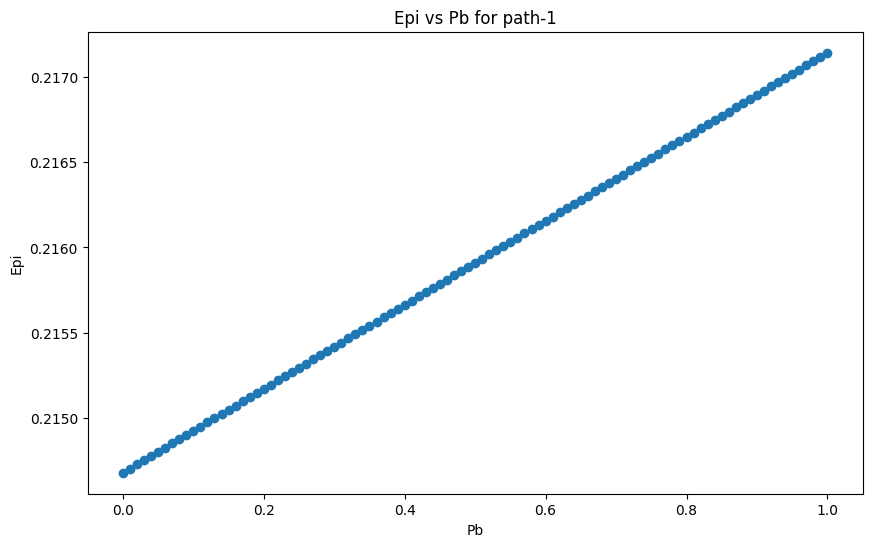

In [265]:
master_bep_with_feedback  = []
master_bep_without_feedback = []

for path_name in final_path_tables:
    path_df = final_path_tables[path_name]
    path_nsigr_uper_df = path_nsigr_uper_tables[path_name]
    epi_pb = pd.DataFrame({
            'pb':np.arange(0, 1.01, 0.01),
            'total_epi':[0]*101,
            'avg_epi':[0]*101
        })
    total_epi=[]
    neb = len(path_df)
    bep_wofb = []
    bep_wfb = []
    for pb in np.arange(0, 1.01, 0.01):
        temp_total_epi = 0.0
        # Calculating BSR and BEPR
        efff = pd.DataFrame({
            'Factor':path_nsigr_uper_df['Factor'],
            'Block':path_nsigr_uper_df['Block'],
            'eff':[0]*path_nsigr_uper_df['Factor'].size,
            'feedback':[0]*path_nsigr_uper_df['Factor'].size
        })
        for pass_num in np.arange(1, neb + 2,1):
            effb = pd.DataFrame({
                'Factors':path_df['Factors'],
                'Block':path_df['Block'],
                'BEF':path_df['BEF'],
                'BSR':[0]*path_df['Block'].size,
                'BEPR':[0]*path_df['Block'].size,
                'eff':[0]*path_df['Block'].size,
                'bep':[0]*path_df['Block'].size,
                'bep_without_feedback':[0]*path_df['Block'].size
            })

            BSR = [path_df.at[i,'Bsig']/path_df.loc[pass_num-1:neb-1,'Bsig'].sum() if i>=pass_num-1 else 0 for i in range(0,neb)]
            BEPR = [path_df.at[i,'BEPF']/path_df.loc[pass_num-1:neb-1,'BEPF'].sum() if i>=pass_num-1 else 0 for i in range(0,neb)]
            EFFB=[pb*bsr + (1-pb)*bepr for bsr,bepr in zip(BSR,BEPR)]
            effb['BSR'] = BSR
            effb['BEPR'] = BEPR
            effb['eff'] = EFFB
            bep_values=[]
            bep_values_without_feedback=[]
            if pass_num >1:
              feedbacks = []
              for index1,parent_row in efff.iterrows():  # Adjusting index for factor numbering
                  factor = parent_row['Factor']
                  block = parent_row['Block']
                  feedback = 0.0
                  for index2,row in efff.iterrows():
                      if block < row['Block']:
                          feedback += row['eff'] * n_iim[int(row['Factor']) - 1][int(factor) - 1]
                  feedbacks.append(feedback)
              efff['feedback'] = feedbacks
            EFFF=[]
            for index, row in path_nsigr_uper_df.iterrows():
                factor = row['Factor']
                nsig_ratio = row['nsig_ratio']
                uepr = row['uepr']
                block = row['Block']
                # Get Pf and Effort for the block
                if block is not None:
                    Pf = path_df.iloc[path_df[path_df['Block']==block].index]['Pf']
                    Effort = EFFB[path_df[path_df['Block']==block].index[0] ]
                    # Calculate effort for the factor
                    factor_effort = Effort * (Pf.iloc[0] * nsig_ratio + (1 - Pf) * uepr)
                    EFFF.append(factor_effort.iloc[0])
            efff['eff'] = EFFF
            for index, effb_row in effb.iterrows():
                block = effb_row['Block']
                eff_block = effb_row['eff']
                bef_block = effb_row['BEF']

                # Calculating the first part of the BEP formula
                bep = eff_block * bef_block

                # Getting all factors in the same block from efff DataFrame
                factors_in_block = efff[efff['Block'] == block]['Factor']

                # Calculating the sum of feedback * UEPF for each factor in the block
                feedback_sum = sum(
                    efff[efff['Factor'] == factor]['feedback'].iloc[0] * df[df['Factor'] == factor]['UEPF'].iloc[0]
                    for factor in factors_in_block
                )

                # Adding the feedback sum to the BEP
                bep_values_without_feedback.append(bep)
                bep += feedback_sum
                bep_values.append(bep)

            effb['bep'] = bep_values
            effb['bep_without_feedback']=bep_values_without_feedback
            if pb==1:
              master_bep_with_feedback.append(bep_values)
              master_bep_without_feedback.append(bep_values_without_feedback)
            temp_total_epi += effb['bep'].loc[:neb-1].sum()
            with open('solution.txt', 'a') as file:
                    # Writing the path name and factors included in that path
                factors_in_path = ', '.join([str(factor) for factor in flattened_combinations[int(path_name.split('-')[1]) - 1][bucket_name]])
                file.write(f"{path_name} \"Factors included in that path: {factors_in_path} and effort and feedback of factors for pass {pass_num} and pb {pb}\"\n")
                # Writing the table for each path
                file.write(efff.to_string(index=False))
                file.write("\n\n")  # Adding space between tables for readability
                file.write(f"{path_name} \"Factors included in that path: {factors_in_path} and effort of blocks for pass {pass_num} and pb {pb}\"\n")
                # Writing the table for each path
                file.write(effb.to_string(index=False))
                file.write("\n\n")  # Adding space between tables for readability
                file.write(f"{path_name} \"Factors included in that path: {factors_in_path} and total_epi for pass {pass_num} and pb {pb} = {temp_total_epi}\"\n")
                file.write("\n\n")  # Adding space between tables for readability
        total_epi.append(temp_total_epi)
    epi_pb['total_epi'] = total_epi
    epi_pb['avg_epi'] = [epi/neb for epi in total_epi]
    with open('solution.txt', 'a') as file:
        file.write(f"{path_name} \"Factors included in that path: {factors_in_path} epi vs pb\"\n")
        file.write(epi_pb.to_string(index=False))
        file.write("\n\n")  # Adding space between tables for readability
    plt.figure(figsize=(10, 6))
    plt.plot(epi_pb['pb'], epi_pb['avg_epi'], marker='o')  # 'o' for circle markers

    # Adding labels and title
    plt.xlabel('Pb')
    plt.ylabel('Epi')
    plt.title(f'Epi vs Pb for {path_name}')

    # Displaying the plot
    plt.show()

Comparison of BEP values with and without feedback

Avg EPI without feedback for pb = 1 0.1475350890974033


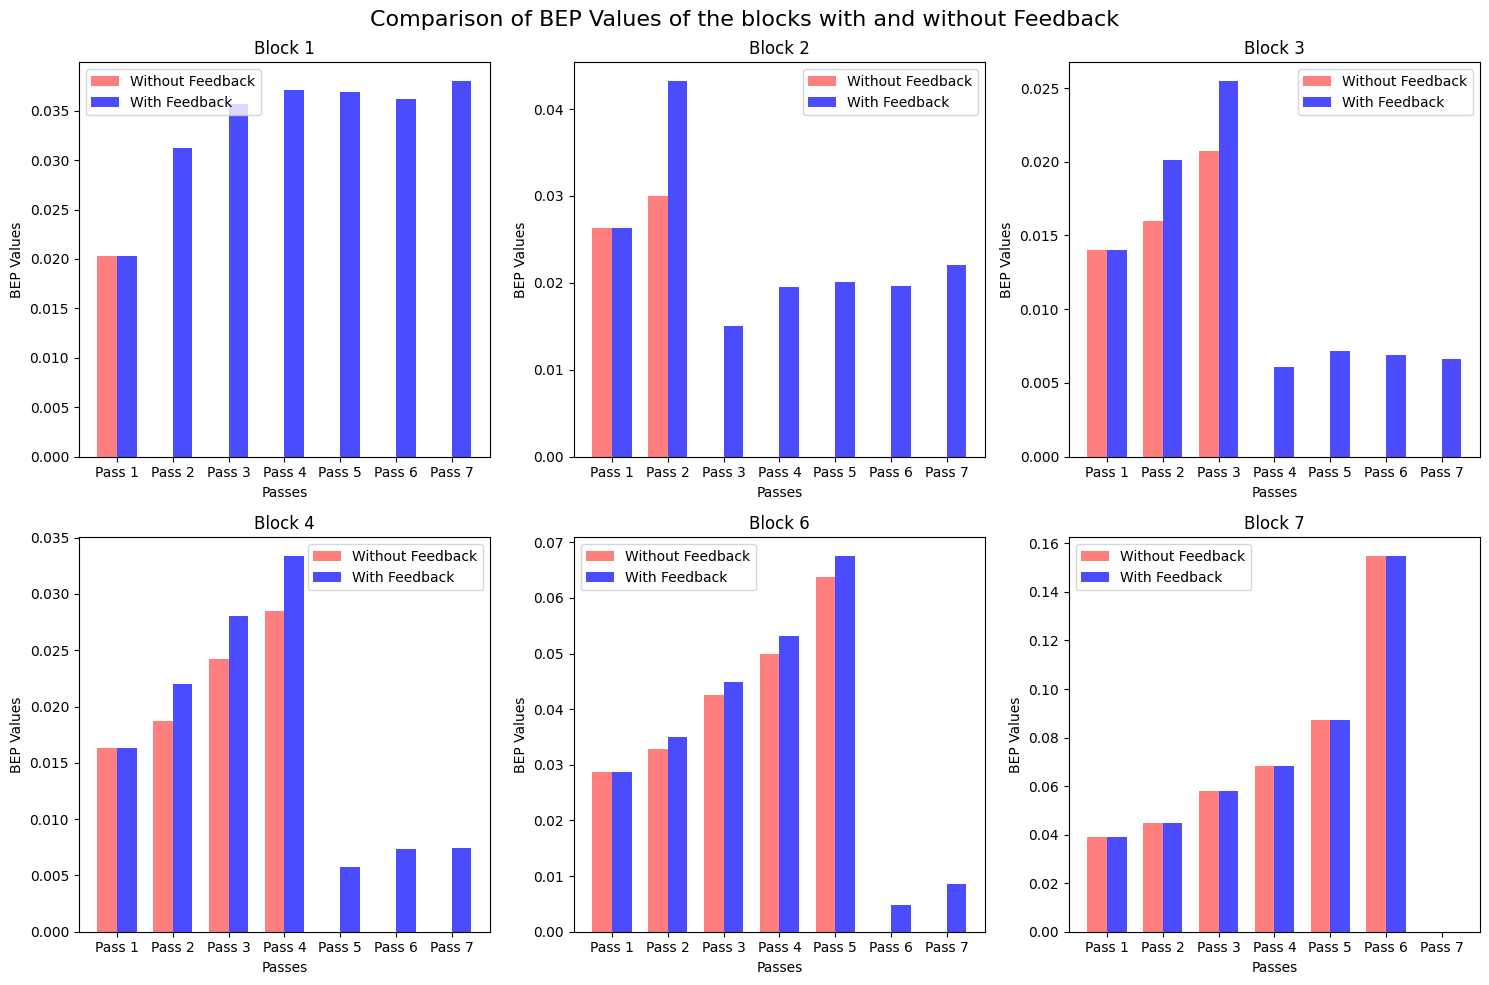

In [271]:
master_bep_without_feedback=list(map(list, zip(*master_bep_without_feedback)))
master_bep_with_feedback=list(map(list, zip(*master_bep_with_feedback)))

total_sum = sum(sum(sublist) for sublist in master_bep_without_feedback)
avg_epi_without_feedback_for_pb_1 = total_sum/6
print('Avg EPI without feedback for pb = 1 :',avg_epi_without_feedback_for_pb_1)
passes = ['Pass 1', 'Pass 2', 'Pass 3', 'Pass 4', 'Pass 5', 'Pass 6', 'Pass 7']
block_names = ['Block 1', 'Block 2', 'Block 3', 'Block 4', 'Block 6', 'Block 7']

bar_width = 0.35
index = np.arange(len(passes))

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(2):
    for j in range(3):
        block_index = 3*i + j
        axs[i, j].bar(index - bar_width/2, master_bep_without_feedback[block_index], bar_width, color='red', alpha=0.5, label='Without Feedback')
        axs[i, j].bar(index + bar_width/2, master_bep_with_feedback[block_index], bar_width, color='blue', alpha=0.7, label='With Feedback')
        axs[i, j].set_xlabel('Passes')
        axs[i, j].set_ylabel('BEP Values')
        axs[i, j].set_title(block_names[block_index])
        axs[i, j].set_xticks(index)
        axs[i, j].set_xticklabels(passes)
        axs[i, j].legend()
        axs[i, j].grid(False)

fig.suptitle('Comparison of BEP Values of the blocks with and without Feedback', fontsize=16)
plt.tight_layout()
plt.show()

In [267]:
print(efff)

    Factor  Block  eff  feedback
0       12      1  0.0  0.035293
1        8      1  0.0  0.035030
2        7      1  0.0  0.053424
3       16      1  0.0  0.053545
4       15      1  0.0  0.061613
5        1      2  0.0  0.050101
6       10      2  0.0  0.053839
7        3      2  0.0  0.064393
8       13      3  0.0  0.047370
9       11      4  0.0  0.056647
10       9      6  0.0  0.058432
11       2      7  0.0  0.000000
